<a href="https://colab.research.google.com/github/Annettteee/annette-colab-projects/blob/main/TAD_Fiction_vs_others.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Text** **As** **Data** **Individual** **Final**

**Annette** **Darpoh**

##**1.1 Introduction**

###**1.1.1 Problem Statement**


Fiction novels are stories made from ones imagination that are sometimes based on a true story. When giving a description of these novels, are authors or people more prone to using sentiments or certain words as compared to other book genres?

For my individual final, I decided to compare how Fiction novels are described as compared to other novels as I identify if certain words are used more in Fiction novel or whether more sentiments are used in Fiction novels than in other novels.

###**1.1.2 Research Question**

How do sentiments in descriptions of Fiction novels differ from that of novels of different genres?

###**1.1.3 Data Overview and Analysis Plan**

I used a dataset from Kaggle called the Book Dataset that contains more than 6,
000 books with their authors, descriptions, genres and other data.

I plan on examining polarity and subjectivity of the descriptions using Sentiment Analysis tool such as TextBlob and compare them in the various book genres. I also plan to supplement it with affective linguistic markers provided by LIWC(Linguistic Inquiry and Word Count).

###**1.1.4 Hypothesis**

I expect Fiction novels to have, on average, low sentiment scores, diverse emotional range, or balanced tone as compared to other genres since they are imaginary. I would also expect to see certain words like "imaginary", "love", "future" and so on.

## **1.2 Process and Analysis**

###**1.2.1 Importing Libraries**

In [ ]:
## Import important libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import string
from collections import Counter
import statsmodels.formula.api as smf
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
print(stopwords.words('english'))
import statsmodels.formula.api as smf

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###**1.2.2 Loading the data and LIWC features**

In [ ]:
## Load the data
df = pd.read_csv('/content/data.csv')
df.head()


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [ ]:
#Load the LIWC features
descriptions_liwc_df = pd.read_csv('/content/LIWC2015_Results_data.csv')
descriptions_liwc_df.head()

,A,B,C,D,E,F,G,H,I,J,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,...,9.50,0.5,0.00,0.00,0.0,0.50,0.0,3.50,2.00,0.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,...,3.40,0.0,0.00,0.97,0.0,1.94,0.0,2.43,0.97,0.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,...,0.00,0.0,0.00,0.00,0.0,6.67,0.0,6.67,0.00,0.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,...,7.27,0.0,0.00,0.00,0.0,7.27,0.0,1.82,0.00,0.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,...,15.22,0.0,2.17,0.00,0.0,2.17,0.0,2.17,0.00,0.0


In [ ]:
##Get a glimpse of how the data looks interms of type
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB
None


In [ ]:
##How mant rows and columns are we looking at
print(df.shape)

(6810, 12)


In [ ]:
##What are the various categories
print(df['categories'].unique())

['Fiction' 'Detective and mystery stories' 'American fiction'
 'Christian life' 'Authors, English' 'Africa, East'
 'Hyland, Morn (Fictitious character)' 'Adventure stories'
 'Arthurian romances' 'Fantasy fiction' nan 'English drama' 'Country life'
 'English fiction' 'Clergy' 'Aubrey, Jack (Fictitious character)'
 'Detective and mystery stories, English' 'Black Death' 'Human cloning'
 'Science fiction' 'Great Britain' 'American essays' 'China' 'Capitalism'
 'Ireland' 'Juvenile Fiction' "Children's stories, English"
 'Male friendship' 'Literary Collections'
 'Beresford, Tommy (Fictitious character)' 'Imaginary wars and battles'
 'Dysfunctional families' 'Poirot, Hercule (Fictitious character)'
 'Christmas stories' 'Marple, Jane (Fictitious character)' 'Belgians'
 'Battle, Superintendent (Fictitious character)'
 'Baggins, Frodo (Fictitious character)' 'Cambridge (Mass.)'
 'Business enterprises' 'Emotional problems'
 'Characters and characteristics in motion pictures'
 'Fantasy fiction, En

###**1.2.3 Data Cleaning and Preparation**

Before analyzing the text, I cleaned the dataset by removing duplicates and missing values in the 'description' and 'categories' columns, tokenizing text and removing punctuation and stopwords, lemmatizing tokens to reduce variation and improve consistency.

This preprocessing ensures that my sentiment analysis is based on a clean, normalized corpus.

In [ ]:
##Remove duplicates and n/a values
df = df.dropna(subset=['categories', 'description'])

df['description'] = df['description'].astype(str).str.lower().str.strip()

cleaned_df = df.drop_duplicates(subset=['description', 'categories'])

print(f"Total descriptions after cleaning: {len(cleaned_df)}")
cleaned_df.info()

Total descriptions after cleaning: 6460
<class 'pandas.core.frame.DataFrame'>
Index: 6460 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6460 non-null   int64  
 1   isbn10          6460 non-null   object 
 2   title           6460 non-null   object 
 3   subtitle        2273 non-null   object 
 4   authors         6397 non-null   object 
 5   categories      6460 non-null   object 
 6   thumbnail       6253 non-null   object 
 7   description     6460 non-null   object 
 8   published_year  6456 non-null   float64
 9   average_rating  6426 non-null   float64
 10  num_pages       6426 non-null   float64
 11  ratings_count   6426 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 656.1+ KB


<ipython-input-52-b0de2c1527a7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = df['description'].astype(str).str.lower().str.strip()


In [ ]:
##Get the number of counts for the top 3 genres
print(df['categories'].value_counts().head(3))

categories
Fiction                      2537
Juvenile Fiction              535
Biography & Autobiography     392
Name: count, dtype: int64


In [ ]:
##Divide the categories onto Fiction and Other
df['categories'] = df['categories'].apply(lambda x: 'Fiction' if x == 'Fiction' else 'Other')

<ipython-input-54-f561891b94d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['categories'] = df['categories'].apply(lambda x: 'Fiction' if x == 'Fiction' else 'Other')


In [ ]:
# Get a DataFrame containing only Fiction books
fiction_books = df[df['categories'] == 'Fiction']

# Get a DataFrame containing only NOn-Fiction books
other_books = df[df['categories'] == 'Other']

fiction_books.head()


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,a novel that readers and critics have been eag...,2004.0,3.85,247.0,361.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"a memorable, mesmerizing heroine jennifer -- b...",1993.0,3.93,512.0,29532.0
12,9780006482079,0006482074,Warhost of Vastmark,NaN,Janny Wurts,Fiction,http://books.google.com/books/content?id=uOL0f...,"tricked once more by his wily half-brother, ly...",1995.0,4.03,522.0,2966.0
54,9780007121014,0007121016,Taken at the Flood,NaN,Agatha Christie,Fiction,http://books.google.com/books/content?id=3gWlx...,a few weeks after marrying an attractive young...,2002.0,3.71,352.0,8852.0
69,9780007149827,0007149824,The Yiddish Policemen's Union,A Novel,Michael Chabon,Fiction,http://books.google.com/books/content?id=-reD1...,"for sixty years, jewish refugees and their des...",2007.0,3.70,414.0,51219.0


In [ ]:
##How many descriptions are under each of the two(fiction and other)
category_counts = df['categories'].value_counts()
print(f"Number of Fiction: {category_counts.get('Fiction', 0)}")
print(f"Number of Other: {category_counts.get('Other', 0)}")

Number of Fiction: 2537
Number of Other: 3974


In [ ]:
##Print the default punctuation and add custom punctuations
punctuation_from_string_pkg = string.punctuation
print('Original list:')
print(punctuation_from_string_pkg)

punctuation_custom = punctuation_from_string_pkg.replace('*', '')
punctuation_custom = punctuation_custom + '''’’"“”*'''
print('\n' + 'New list:')
print(punctuation_custom)

Original list:
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

New list:
!"#$%&'()+,-./:;<=>?@[\]^_`{|}~’’"“”*


In [ ]:
def clean_descriptions_text(text):
## Remove all punctuations from the descriptions
    no_punct = text.translate(str.maketrans('', '', punctuation_custom))

    lowercase = no_punct.lower()
    words = lowercase.split()
    return words

df['basic_tokens'] = df['description'].apply(clean_descriptions_text)

df[['description', 'basic_tokens']].head()

,description,basic_tokens
0,a novel that readers and critics have been eag...,"[a, novel, that, readers, and, critics, have, ..."
1,a new 'christie for christmas' -- a full-lengt...,"[a, new, christie, for, christmas, a, fullleng..."
2,volume two of stephen donaldson's acclaimed se...,"[volume, two, of, stephen, donaldsons, acclaim..."
3,"a memorable, mesmerizing heroine jennifer -- b...","[a, memorable, mesmerizing, heroine, jennifer,..."
4,lewis' work on the nature of love divides love...,"[lewis, work, on, the, nature, of, love, divid..."


In [ ]:
# Remove all stopwords
stop_words = set(stopwords.words('english'))

def remove_all_stopwords(tokens):
   return [token for token in tokens if token not in stop_words]

df['tokens_no_stopwords'] = df['basic_tokens'].apply(remove_all_stopwords)

df[['basic_tokens', 'tokens_no_stopwords']].head()

,basic_tokens,tokens_no_stopwords
0,"[a, novel, that, readers, and, critics, have, ...","[novel, readers, critics, eagerly, anticipatin..."
1,"[a, new, christie, for, christmas, a, fullleng...","[new, christie, christmas, fulllength, novel, ..."
2,"[volume, two, of, stephen, donaldsons, acclaim...","[volume, two, stephen, donaldsons, acclaimed, ..."
3,"[a, memorable, mesmerizing, heroine, jennifer,...","[memorable, mesmerizing, heroine, jennifer, br..."
4,"[lewis, work, on, the, nature, of, love, divid...","[lewis, work, nature, love, divides, love, fou..."


[('new', 1457), ('life', 1372), ('one', 1269), ('first', 1156), ('world', 1094), ('book', 957), ('story', 734), ('time', 676), ('novel', 655), ('author', 650), ('love', 644), ('reprint', 594), ('young', 569), ('two', 567), ('work', 566), ('years', 563), ('man', 552), ('war', 532), ('stories', 510), ('history', 509), ('family', 496), ('original', 475), ('edition', 426), ('american', 416), ('also', 409)]


<Axes: xlabel='Samples', ylabel='Counts'>

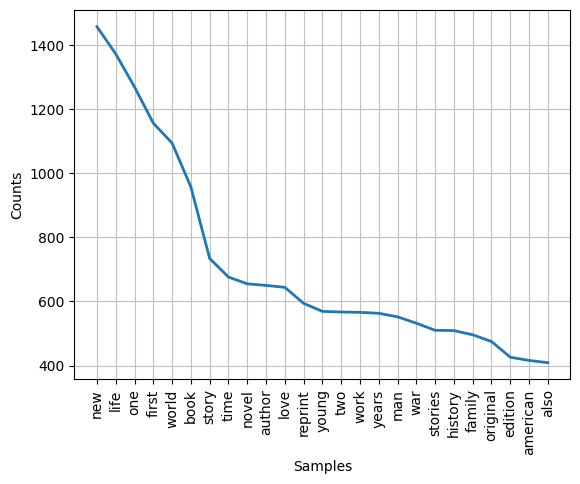

In [ ]:
#Plot the most frequent words
all_tokens_no_sw = [token for tokens in df['tokens_no_stopwords'] for token in tokens]

print(FreqDist(all_tokens_no_sw).most_common(25))
FreqDist(all_tokens_no_sw).plot(25)

This line graph shows the most frequently used words, we see words like new, life, one and so on as frequently used words.

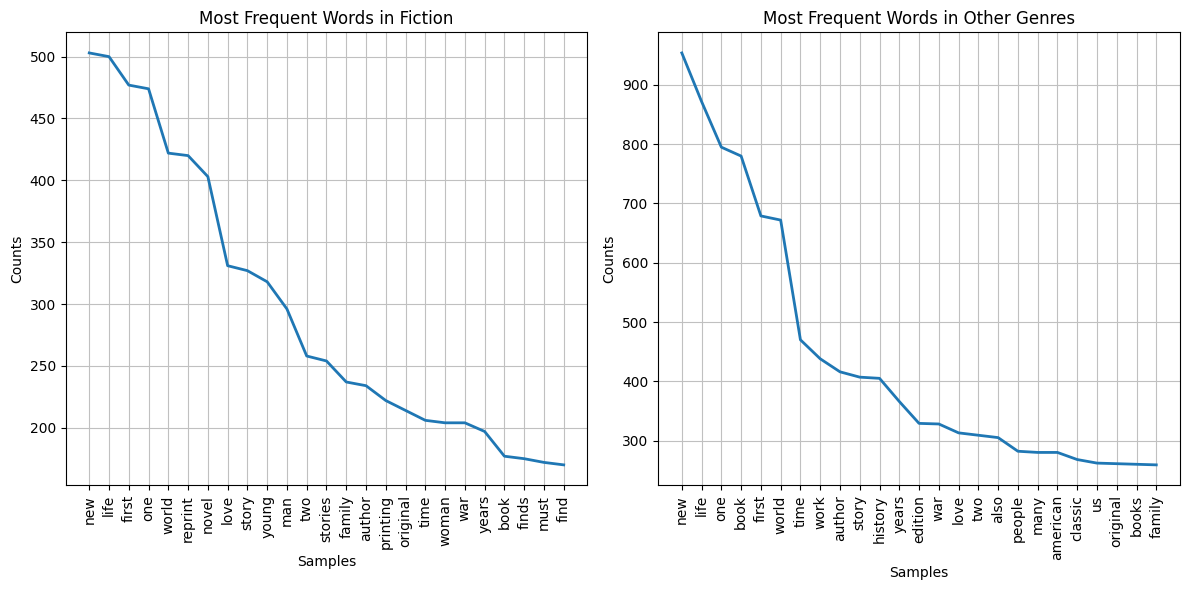

In [ ]:
#Plot the most frequently used words by fiction or non-fiction books


# Separate tokens by category
fiction_tokens = []
other_tokens = []
for index, row in df.iterrows():
    if row['categories'] == 'Fiction':
        fiction_tokens.extend(row['tokens_no_stopwords'])
    else:
        other_tokens.extend(row['tokens_no_stopwords'])

# Calculate frequency distributions
fiction_freqdist = FreqDist(fiction_tokens)
other_freqdist = FreqDist(other_tokens)

# Plot the most frequent words for each category
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
fiction_freqdist.plot(25, title='Most Frequent Words in Fiction')

plt.subplot(1, 2, 2)
other_freqdist.plot(25, title='Most Frequent Words in Other Genres')

plt.tight_layout()
plt.show()


In [ ]:
#Lemmatize the tokens
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
  return [lemmatizer.lemmatize(token) for token in tokens]

df['lemmas'] = df['tokens_no_stopwords'].apply(lemmatize_tokens)

df['description_lemmas'] = df['lemmas'].apply(lambda toks: ' '.join(toks))

df[['lemmas', 'description_lemmas']].head()

,lemmas,description_lemmas
0,"[novel, reader, critic, eagerly, anticipating,...",novel reader critic eagerly anticipating decad...
1,"[new, christie, christmas, fulllength, novel, ...",new christie christmas fulllength novel adapte...
2,"[volume, two, stephen, donaldsons, acclaimed, ...",volume two stephen donaldsons acclaimed second...
3,"[memorable, mesmerizing, heroine, jennifer, br...",memorable mesmerizing heroine jennifer brillia...
4,"[lewis, work, nature, love, divide, love, four...",lewis work nature love divide love four catego...


In [ ]:
## Print out the first few rows with polarity and subjectivity
df['polarity'] = df['description_lemmas'].apply(lambda txt: TextBlob(txt).sentiment.polarity)
df['subjectivity'] = df['description_lemmas'].apply(lambda txt: TextBlob(txt).sentiment.subjectivity)
df[['polarity','subjectivity']].head()

,polarity,subjectivity
0,0.183333,0.738889
1,0.061356,0.573146
2,0.150000,0.300000
3,0.116667,0.688462
4,0.224074,0.555556


In [ ]:
##Summarize the polarity and subjectivity by categories
sentiment_stats = df.groupby('categories')[['polarity','subjectivity']].agg(
mean_polarity = ('polarity', 'mean'),
median_polarity = ('polarity', 'median'),
std_polarity = ('polarity', 'std'),
descriptions_count = ('polarity', 'count'),
mean_subjectivity = ('subjectivity', 'mean'),
median_subjectivity= ('subjectivity', 'median'),
std_subjectivity = ('subjectivity', 'std')
)
print(sentiment_stats)

            mean_polarity  median_polarity  std_polarity  descriptions_count  \
categories                                                                     
Fiction          0.065795         0.055556      0.220925                2537   
Other            0.119316         0.111111      0.200333                3974   

            mean_subjectivity  median_subjectivity  std_subjectivity  
categories                                                            
Fiction              0.462370             0.480769          0.233294  
Other                0.435117             0.454370          0.230436  


In [ ]:
#Print out the top 25 words for both genres to see if certain words appear more in one than the other
fiction_tokens = df.loc[df['categories']=='Fiction', 'lemmas'].sum()
other_tokens = df.loc[df['categories']=='Other', 'lemmas'].sum()

top_fiction = Counter(fiction_tokens).most_common(25)
top_other = Counter(other_tokens).most_common(25)
print("Top 10 Fiction‐descriptions Words:", top_fiction)
print("Top 10 Other‐descriptions Words:", top_other)

Top 10 Fiction‐descriptions Words: [('life', 630), ('story', 581), ('novel', 518), ('new', 503), ('one', 485), ('world', 482), ('first', 477), ('reprint', 420), ('love', 355), ('find', 345), ('man', 329), ('author', 322), ('young', 318), ('time', 298), ('woman', 293), ('family', 283), ('two', 258), ('book', 251), ('work', 231), ('year', 227), ('war', 227), ('printing', 222), ('original', 214), ('tale', 207), ('death', 181)]
Top 10 Other‐descriptions Words: [('life', 1076), ('book', 1040), ('new', 954), ('one', 850), ('world', 791), ('first', 679), ('work', 667), ('story', 663), ('time', 627), ('author', 560), ('year', 468), ('history', 430), ('war', 399), ('edition', 355), ('novel', 346), ('love', 341), ('reader', 328), ('woman', 317), ('american', 316), ('guide', 315), ('people', 310), ('two', 309), ('classic', 307), ('also', 305), ('family', 301)]


###**1.2.4 Regression Analysis**

I conducted a simple linear regression to examine the effect of genre on sentiment polarity. The model indicates that being a fiction book is associated with a **0.0535 decrease in average polarity**, and the result is statistically significant (p < 0.001). This shows that the earlier visual observation that fiction descriptions tend to be less overtly positive than other genres.


In [ ]:
# create new column 0 for Fiction‐descriptions and 1 for Other‐descriptions descriptions.
df['fiction_dummy'] = (df['categories'] == 'Fiction').astype(int)
# fit the model
model = smf.ols('polarity ~ fiction_dummy', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               polarity   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     101.9
Date:                Sat, 10 May 2025   Prob (F-statistic):           8.58e-24
Time:                        23:07:51   Log-Likelihood:                 967.30
No. Observations:                6511   AIC:                            -1931.
Df Residuals:                    6509   BIC:                            -1917.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1193      0.003     36.058

###**1.2.5 Visualizations**

Created visualizations to plot relationships between certain features of the categories.

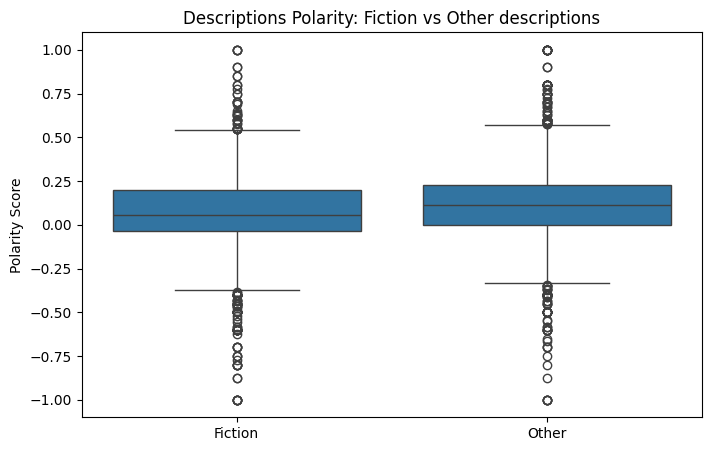

In [ ]:
# Boxplot showing the relationship between polarity scires and the two genres
plt.figure(figsize=(8,5))
sns.boxplot(x='categories', y='polarity', data=df)
plt.title('Descriptions Polarity: Fiction vs Other descriptions')
plt.xlabel('')
plt.ylabel('Polarity Score')
plt.show()

##Interpretation: Boxplot of Polarity Scores by Genre

This boxplot shows the relationship between the polarity of book descriptions between Fiction and Non-Fiction genres. We see Fiction books have a slightly lower median polarity as compared to non-fiction books. This shows that Fiction book descritions have more emotionally neutral language. We also see other genres have slightly higher and more varied polarity scores from their interquartile range. We also see outliers which show emotionally charged language but all in all wee see that the hypothesis taht Fiction uses a more balanced tone is true here.

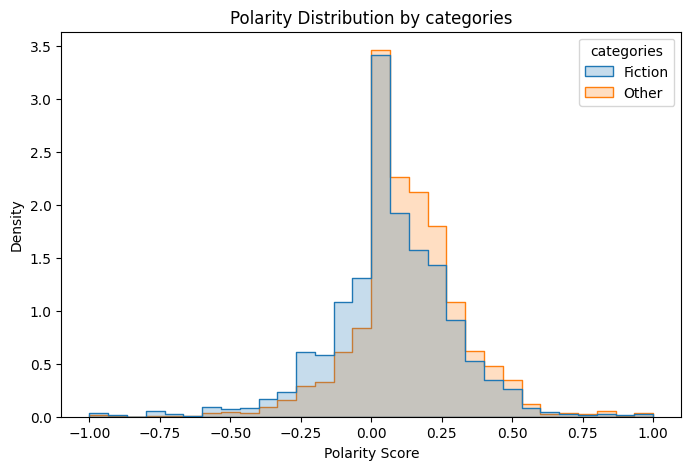

In [ ]:
##Plot to show the relationship between the categories by polarity score using density
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='polarity', hue='categories',

element='step', stat='density', common_norm=False, bins=30)

plt.title('Polarity Distribution by categories')
plt.xlabel('Polarity Score')
plt.show()

## Interpretation: Polarity Distribution Histogram

This histogram shows the density distribution of polarity scores for Fiction and Non-fiction books. W esee a cluster arround lower polarity scores for Fiction books whiles Other genres have a gentle right skew. This shows that other genres have more positive language. Also, the overlapping of both genres show that both genres share some emotional elements but the whole distribution shows that Fiction books are more emotionally complex.

In [ ]:
#Printing the correlation between the avearge rating and the polarity of the descriptions
corr = df[['average_rating','polarity']].dropna().corr().loc['average_rating','polarity']
print(f"Correlation between numeric rating and polarity: {corr:.2f}")

Correlation between numeric rating and polarity: 0.01


###**1.2.6 LIWC Integration**

To further understand emotional tone, I used LIWC features such as positive emotion (`posemo`), negative emotion (`negemo`), sadness (`sad`), and anger (`anger`).

I generated a violin plot below toshow how Fiction books tend to exhibit slightly higher variability in affective scores, though the averages are often comparable.

This supports the idea that fiction may cover a broader range of emotional topics, but not necessarily in a more extreme or dramatic way.

In [ ]:
#Renaming the columns
descriptions_liwc_df = descriptions_liwc_df.rename(columns={'A': 'ISBN13', 'I': 'Published year', 'J': 'Average rating', 'F':'Categories', 'H': 'Description', 'E': 'Authors', 'G': 'Thumbnail', 'D': 'Subtitle', 'B': 'isbn10'})
descriptions_liwc_df.head()

,ISBN13,isbn10,C,Subtitle,Authors,Categories,Thumbnail,Description,Published year,Average rating,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,...,9.50,0.5,0.00,0.00,0.0,0.50,0.0,3.50,2.00,0.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,...,3.40,0.0,0.00,0.97,0.0,1.94,0.0,2.43,0.97,0.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,...,0.00,0.0,0.00,0.00,0.0,6.67,0.0,6.67,0.00,0.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,...,7.27,0.0,0.00,0.00,0.0,7.27,0.0,1.82,0.00,0.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,...,15.22,0.0,2.17,0.00,0.0,2.17,0.0,2.17,0.00,0.0


In [ ]:
#Describing LIWC features and giving a summary of their mean, standard deviation and so on
print(descriptions_liwc_df.shape)
descriptions_liwc_df.describe()

(6810, 105)


,ISBN13,Published year,Average rating,K,L,WC,Analytic,Clout,Authentic,Tone,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,...,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04,64.986050,89.604899,71.485540,19.574360,43.504419,...,6.419865,0.165703,0.127968,0.108345,0.067530,1.953419,0.861668,1.491996,0.230314,0.191198
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05,67.216779,21.738621,21.768449,24.345791,37.550030,...,5.524883,1.570962,0.923281,0.617454,0.581667,3.514757,3.429535,2.365993,2.849220,1.893230
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02,26.000000,93.110000,61.260000,1.490000,4.255000,...,2.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03,39.000000,97.960000,75.340000,9.110000,25.770000,...,5.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03,79.000000,99.000000,87.400000,28.775000,83.880000,...,8.890000,0.000000,0.000000,0.000000,0.000000,2.900000,0.000000,2.500000,0.000000,0.000000
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06,932.000000,99.000000,99.000000,99.000000,99.000000,...,63.160000,100.000000,28.120000,14.040000,21.820000,62.960000,72.730000,33.330000,200.000000,100.000000


In [ ]:
print(list(descriptions_liwc_df.columns))

['ISBN13', 'isbn10', 'C', 'Subtitle', 'Authors', 'Categories', 'Thumbnail', 'Description', 'Published year', 'Average rating', 'K', 'L', 'WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'Sixltr', 'Dic', 'function', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'compare', 'interrog', 'number', 'quant', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend', 'female', 'male', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'percept', 'see', 'hear', 'feel', 'bio', 'body', 'health', 'sexual', 'ingest', 'drives', 'affiliation', 'achieve', 'power', 'reward', 'risk', 'focuspast', 'focuspresent', 'focusfuture', 'relativ', 'motion', 'space', 'time', 'work', 'leisure', 'home', 'money', 'relig', 'death', 'informal', 'swear', 'netspeak', 'assent', 'nonflu', 'filler', 'AllPunc', 'Period', 'Comma', 'Colon', 'SemiC', 'QMark', 'Exclam', 'Dash', 'Quote', '

In [ ]:
#Adding polarity and Subjectivity to Liwc
descriptions_df = df.copy()
descriptions_df['Polarity'] = df['description'].apply(lambda essay: TextBlob(essay).sentiment.polarity)
descriptions_df['Subjectivity'] = df['description'].apply(lambda essay: TextBlob(essay).sentiment.subjectivity)

descriptions_df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,...,ratings_count,basic_tokens,tokens_no_stopwords,lemmas,description_lemmas,polarity,subjectivity,fiction_dummy,Polarity,Subjectivity
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,a novel that readers and critics have been eag...,2004.0,3.85,...,361.0,"[a, novel, that, readers, and, critics, have, ...","[novel, readers, critics, eagerly, anticipatin...","[novel, reader, critic, eagerly, anticipating,...",novel reader critic eagerly anticipating decad...,0.183333,0.738889,1,0.183333,0.738889
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Other,http://books.google.com/books/content?id=gA5GP...,a new 'christie for christmas' -- a full-lengt...,2000.0,3.83,...,5164.0,"[a, new, christie, for, christmas, a, fullleng...","[new, christie, christmas, fulllength, novel, ...","[new, christie, christmas, fulllength, novel, ...",new christie christmas fulllength novel adapte...,0.061356,0.573146,0,0.052674,0.524689
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,Other,http://books.google.com/books/content?id=OmQaw...,volume two of stephen donaldson's acclaimed se...,1982.0,3.97,...,172.0,"[volume, two, of, stephen, donaldsons, acclaim...","[volume, two, stephen, donaldsons, acclaimed, ...","[volume, two, stephen, donaldsons, acclaimed, ...",volume two stephen donaldsons acclaimed second...,0.150000,0.300000,0,0.150000,0.300000
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"a memorable, mesmerizing heroine jennifer -- b...",1993.0,3.93,...,29532.0,"[a, memorable, mesmerizing, heroine, jennifer,...","[memorable, mesmerizing, heroine, jennifer, br...","[memorable, mesmerizing, heroine, jennifer, br...",memorable mesmerizing heroine jennifer brillia...,0.116667,0.688462,1,0.144048,0.675000
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Other,http://books.google.com/books/content?id=XhQ5X...,lewis' work on the nature of love divides love...,2002.0,4.15,...,33684.0,"[lewis, work, on, the, nature, of, love, divid...","[lewis, work, nature, love, divides, love, fou...","[lewis, work, nature, love, divide, love, four...",lewis work nature love divide love four catego...,0.224074,0.555556,0,0.189583,0.550000


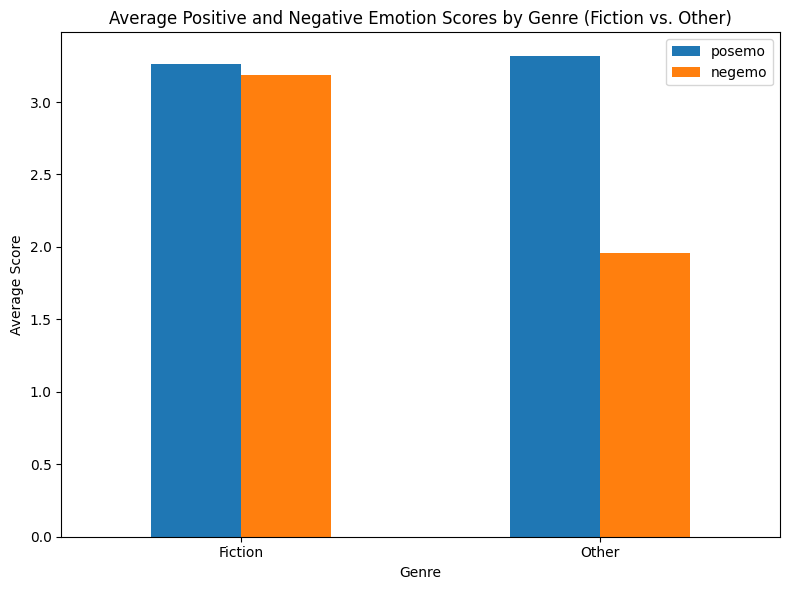

In [ ]:
# Filter for 'Fiction' and 'Other' categories and plot a bar charst for the posemo and negemo scores
fiction_df = descriptions_liwc_df[descriptions_liwc_df['Categories'] == 'Fiction']
other_df = descriptions_liwc_df[descriptions_liwc_df['Categories'] != 'Fiction']


filtered_df = pd.concat([fiction_df, other_df])


filtered_df['Categories'] = filtered_df['Categories'].apply(lambda x: 'Fiction' if x == 'Fiction' else 'Other')


genre_means = filtered_df.groupby('Categories')[['posemo', 'negemo']].mean()


genre_means.plot(kind='bar', figsize=(8, 6))
plt.title('Average Positive and Negative Emotion Scores by Genre (Fiction vs. Other)')
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##Interpretation: LIWC Positive vs Negative Emotion Scores

We showed the avearge LIWC scores for posemo and negemo between Fiction and non Fiction books. The bar chart shows there are negative and positive sentiments in both genres but Fiction's posemo score is slightly higher than that of other genres. This shows that Fiction books explores more diverse emotions while other genres are more positive and optimistic.

In [ ]:
#Filtering categories
filtered_df['Categories'] = filtered_df['Categories'].apply(lambda x: 'Fiction' if x == 'Fiction' else 'Other')

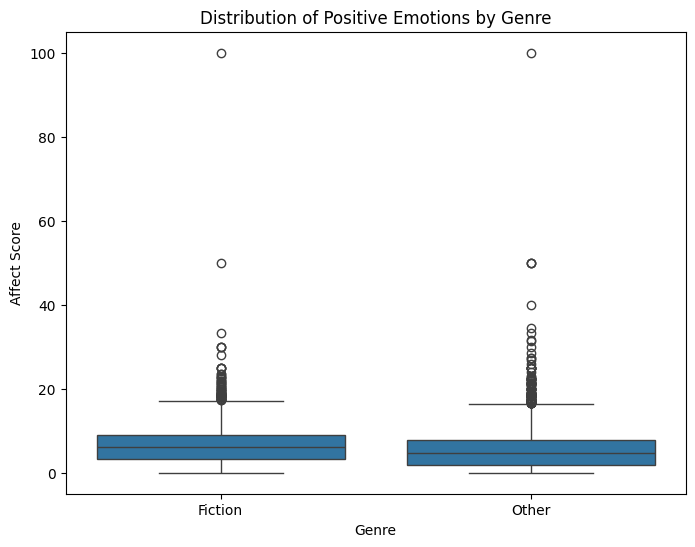

In [ ]:
# Create a box plot to visualize the distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x='Categories', y='affect', data=filtered_df)
plt.title('Distribution of Positive Emotions by Genre')
plt.xlabel('Genre')
plt.ylabel('Affect Score')
plt.show()

##Interpretation: Boxplot of LIWC Affect Scores

The boxplot shows the affect scores for Fiction and Non fiction books. W ee higher variability in affect scores for Fiction and the broad spead shows Fiction books engage in more emotionally evocative storytelling.

In [ ]:
#Printing the LIWC features
liwc_affect_features = [col for col in ['affect', 'posemo', 'negemo', 'anx', 'anger', 'sad'] if col in descriptions_liwc_df.columns]

liwc_affect_features

['affect', 'posemo', 'negemo', 'anx', 'anger', 'sad']

In [ ]:
#Printing LIwc by categories
groupby_categories_max_df = descriptions_liwc_df.groupby('Categories').max(numeric_only =True)
groupby_categories_max_df

,ISBN13,Published year,Average rating,K,L,WC,Analytic,Clout,Authentic,Tone,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
Categories,,,,,,,,,,,,,,,,,,,,,
87th Precinct (Imaginary place),9780752857930,2003.0,3.89,192.0,1051.0,115,98.01,87.09,27.39,1.00,...,2.61,0.87,0.00,2.61,0.00,1.74,0.00,2.61,0.00,0.00
Abandoned mines,9780330301756,1988.0,4.06,192.0,3020.0,20,96.79,69.14,15.86,25.77,...,0.00,0.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00
Aboriginal Australians,9780722540404,2000.0,3.73,323.0,755.0,132,95.13,91.35,41.42,80.64,...,4.55,0.00,0.00,0.00,0.00,0.00,0.00,1.52,0.00,0.00
Abused wives,9780751531244,2005.0,3.86,564.0,10798.0,132,83.03,79.76,3.17,54.29,...,3.79,0.76,0.00,0.00,0.00,1.52,0.00,3.03,0.00,0.00
Accidents,9780099481249,2004.0,3.63,245.0,29552.0,48,99.00,66.17,23.51,25.77,...,2.08,0.00,0.00,0.00,0.00,4.17,4.17,4.17,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yoknapatawpha County (Imaginary place),9780940450554,1990.0,4.49,1148.0,326.0,1,93.26,50.00,1.00,25.77,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00
Young Adult Fiction,9781416914631,2009.0,4.19,498.0,4367341.0,477,99.00,96.03,85.21,91.87,...,8.81,3.03,0.58,5.26,3.03,12.12,3.51,6.09,1.74,3.39
Zero (The number),9780285635944,2003.0,3.96,248.0,116.0,166,99.00,45.21,34.91,48.10,...,7.23,0.60,0.00,0.00,0.00,0.00,0.00,1.81,0.00,0.00


In [ ]:
#Printing by categories using the LIWC features
groupby_categories_max_df[liwc_affect_features]

,affect,posemo,negemo,anx,anger,sad
Categories,,,,,,
87th Precinct (Imaginary place),3.48,0.00,3.48,1.74,1.74,0.00
Abandoned mines,20.00,10.00,10.00,0.00,5.00,5.00
Aboriginal Australians,3.03,3.03,0.00,0.00,0.00,0.00
Abused wives,7.58,4.55,3.03,0.00,1.52,0.76
Accidents,4.17,2.08,2.08,0.00,2.08,0.00
...,...,...,...,...,...,...
Yoknapatawpha County (Imaginary place),0.00,0.00,0.00,0.00,0.00,0.00
Young Adult Fiction,11.30,6.96,5.26,3.51,3.05,1.01
Zero (The number),3.61,2.41,1.20,0.00,1.20,0.00


In [ ]:
#Printing the LIWC Features for Fiction
filtered_groupby_max_df = groupby_categories_max_df.loc[groupby_categories_max_df.index.isin(['Fiction', 'Other'])]

filtered_groupby_max_df[liwc_affect_features]

,affect,posemo,negemo,anx,anger,sad
Categories,,,,,,
Fiction,100.0,50.0,100.0,100.0,15.38,21.43


In [ ]:
#Printing the LIWC Features for Fiction and other
filtered_groupby_max_df = groupby_categories_max_df[
    groupby_categories_max_df.index.str.lower().str.strip().isin(['fiction', 'other'])
]
filtered_groupby_max_df[liwc_affect_features]

,affect,posemo,negemo,anx,anger,sad
Categories,,,,,,
FICTION,10.64,6.9,8.51,2.38,4.26,0.00
Fiction,100.00,50.0,100.00,100.00,15.38,21.43


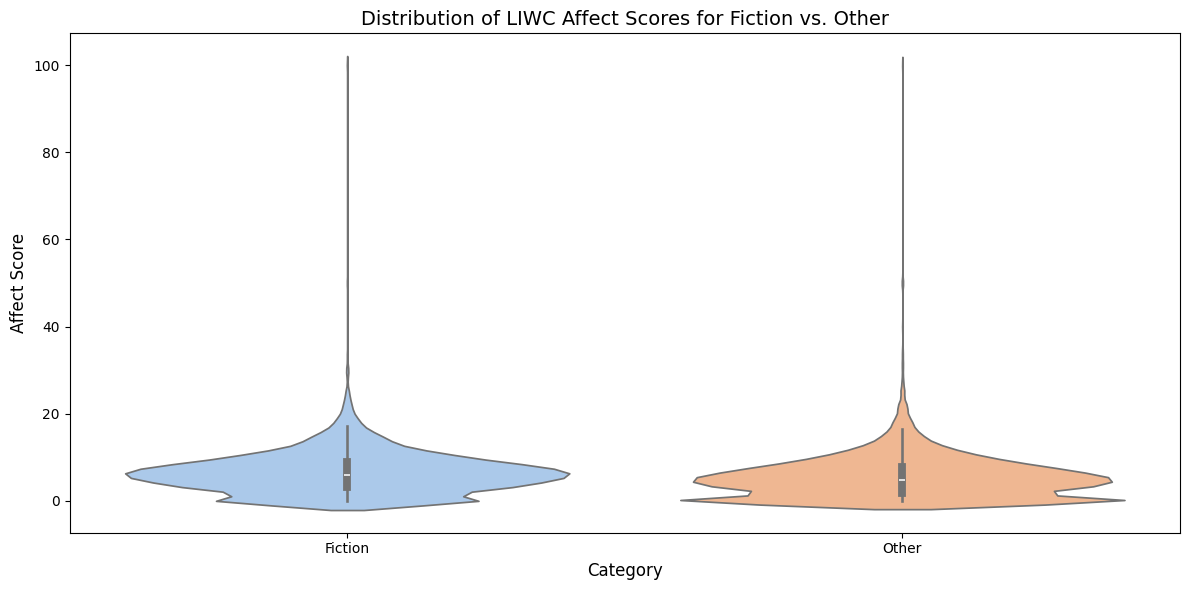

In [ ]:
# Genrating a violin plot for the affect scores
descriptions_liwc_df['Category'] = descriptions_liwc_df['Categories'].apply(lambda x: 'Fiction' if x == 'Fiction' else 'Other')


plt.figure(figsize=(12, 6))
sns.violinplot(
    x='Category',
    y='affect',
    data=descriptions_liwc_df,
    hue='Category',
    palette='pastel',
    inner='box',
    legend=False
)

plt.title('Distribution of LIWC Affect Scores for Fiction vs. Other', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Affect Score', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()


plt.show()

## Interpretation: Voilin Plot

The plot above also plots the affect scores between the two genres. Fiction shows a more dense and wide distribution while other is more centered narrowly. The tails for fiction is wider reinforces the idea that they explore a broader emotional range.

### **Sample Description Reflection**

**Fiction:** “A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives...”  
**Other (e.g., Biography):** “"In The Problem of Pain, C.S. Lewis, one of the most renowned Christian authors and thinkers, examines a universally applicable question within the human condition: If God is good and all-powerful, why does he allow his creatures to suffer pain? With his signature wealth of compassion and insight, C.S. Lewis offers answers to these crucial questions and shares his hope and wisdom to help heal a world hungering for a true understanding of human nature."--Amazon.”  

Fiction leans into emotional language, while Other genres often focus on informative or instructive tones. This supports the polarity difference we see in the sentiment analysis.


### **Manual Reading of Descriptions**

After reading a few descriptions from each genre, I found that Fiction books often include emotionally charged phrases like “imaginary,” “life-changing,” or “a tale of love and loss.” In contrast, other genres such as biographies or self-help tend to use more neutral or motivational language, like “insightful guide,” “revealing journey,” or “principled approach.”

This manual observation reinforces the results of the sentiment and LIWC analyses.

###**Limitations**

We see a few limitations and factors that may affect my analysis like the imbalanced genre grouping i was working with. I compared Fiction books to Other books which is very broad. This could inflate sentiment scores in other due to the more neutral tones.
I also saw a limitation in the descriptions as they are more markerting descritions and not literary. This bias could increase the positive sentiments or affect the word usage.
Another limitation is that emotions in Fiction books are mostly complex and sentiment analysis tools may underreport  the emotional intensity and this may lead to underestimated polarity scores in fiction books.
We see another limittation in the cultural and tempotal differences where we don't control for time or origin.

## **Conclusion**

This project examined the emotional tone of book descriptions across genres using both TextBlob sentiment analysis and LIWC-based linguistic features. The analysis revealed that fiction books tend to exhibit slightly lower average sentiment polarity compared to non-fiction, indicating a more emotionally balanced tone. While non-fiction books often express clearer positive sentiment, fiction appears to explore a broader range of affective language, supporting a richer emotional range.

The LIWC scores reinforced this finding by showing that fiction texts engage more varied emotional categories—even if not always in extreme intensities. This aligns with the narratives of fiction, where themes like love, loss, transformation, and conflict need complex emotional expression.

These results support my original hypothesis that fiction books rely on more diverse emotional cues. Going forward, future work could deepen this exploration by analyzing sentiment at the sub-genre level (e.g., thrillers vs. romance), applying topic modeling to uncover thematic patterns, or even examining how emotional tone varies over time or between authors. This study lays the groundwork for broader inquiries into how language, genre, and emotion intersect in literary spaces.

